# Карта метода

## 1. Название метода

Логистическая регрессия или логит-модель (англ. logit model)

## 2. Описание метода
Логистическая регрессия или логит-модель (англ. logit model) — статистическая модель, используемая для прогнозирования вероятности возникновения некоторого события путём его сравнения с логистической кривой. Эта регрессия выдаёт ответ в виде вероятности бинарного события (1 или 0).

$$
p(X) = \frac{1}{1 + e^{-\left(\beta_0 + \beta_1 X_1 + \beta_2 X_2 + \dots + \beta_p X_p\right)}}
$$

## 3. Описание механизма метода

Механизм метода логистической регрессии включает в себя несколько этапов: подготовка данных, обучение модели и использование модели для предсказаний:

- Подготовка данных
Загрузка данных: Исходные данные, содержащие признаки (features) и целевую переменную (обычно бинарную - 0 или 1), загружаются из источника данных (excel таблицы).

- Предобработка данных: Этот шаг включает очистку данных от выбросов, обработку пропущенных значений, масштабирование признаков (например, стандартизация или нормализация) и преобразование категориальных признаков в числовой формат.

- Разделение данных: Данные разделяются на обучающую выборку (train set) и тестовую выборку (test set). Это важно для оценки производительности модели на новых данных.

- Обучение модели логистической регрессии
Инициализация параметров: Начальные значения весов (weights) и смещения (bias) устанавливаются.

- Определение функции потерь: В логистической регрессии часто используется функция логистической потери (logistic loss), также известная как бинарная кросс-энтропия.

- Оптимизация параметров: Метод градиентного спуска (или его вариации) используется для минимизации функции потерь. Это позволяет оптимизировать параметры модели (веса и смещение) таким образом, чтобы достичь наилучшего соответствия данных.

Использование модели для предсказаний

- Расчет вероятностей: После обучения модели она может использоваться для расчета вероятности принадлежности к классу 1 для новых данных.

- Принятие решений: На основе расчетных вероятностей модель принимает решение о классификации (обычно с пороговым значением, например, 0.5).

- Оценка производительности: Используется тестовая выборка для оценки производительности модели с помощью метрик, таких как точность (accuracy), полнота (recall), F1-мера и другие.

Механизм метода логистической регрессии заключается в загрузке, подготовке и разделении данных, обучении модели путем оптимизации параметров с использованием градиентного спуска и использовании обученной модели для предсказания классов новых данных.

## 4. Описание смысла метода

Логистическая регрессия - это метод машинного обучения, который используется для решения задач классификации, то есть для прогнозирования категориальной переменной на основе набора независимых переменных или признаков. Основная идея логистической регрессии заключается в том, чтобы прогнозировать вероятность принадлежности наблюдения к определенному классу.

## 5. Применение в контексте нашей задачи

Логистическая регрессия отлично решает задачи линейно разделимых классов, отлично подходит в качестве базовой модели, так имеет стабильное числовое решение. 

# Реализация

## Импорт библиотек

In [1]:
import pandas as pd
import numpy as np
import random
import eli5
import matplotlib.pyplot as plt

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression, SGDClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay
from sklearn.decomposition import PCA
from sklearn.model_selection import GridSearchCV
from eli5.sklearn import PermutationImportance

In [2]:
SEED = 42

random.seed(SEED)
np.random.seed(SEED)

## Чтение данных

In [3]:
df = pd.read_excel('../data/dataset.xlsx')
dataset = df.copy()

## Предобработка

In [4]:
categorial_features = dataset.select_dtypes(include=['object']).columns
numerical_features = dataset.select_dtypes(include=['int64', 'float64']).columns

In [5]:
dataset[categorial_features] = pd.get_dummies(dataset[categorial_features], drop_first=True)

X = dataset.drop(['Больной'], axis=1)
y = dataset['Больной']

X_train, X_test, y_train, y_test = train_test_split(X,
                                                    y,
                                                    test_size=0.33,
                                                    random_state=SEED,
                                                    stratify=y,
                                                    shuffle=True)

In [6]:
scaler = StandardScaler()

X_std = X.copy()
X_train_std = X_train.copy()
X_test_std = X_test.copy()

scaler.fit(X_train[numerical_features])

X_train_std[numerical_features] = scaler.transform(X_train[numerical_features])
X_test_std[numerical_features] = scaler.transform(X_test[numerical_features])
X_std[numerical_features] = scaler.transform(X[numerical_features])

## Поиск лучших гиперпараметров для 1 модели

In [7]:
model_1 = LogisticRegression(random_state=SEED)
parameters_1 = {'tol':[1e-3, 1e-4],
              'penalty': ['l1', 'l2'],
              'solver': ['liblinear']}
clf_1 = GridSearchCV(model_1, parameters_1, cv=5)
clf_1.fit(X_std, y)

GridSearchCV(cv=5, estimator=LogisticRegression(random_state=42),
             param_grid={'penalty': ['l1', 'l2'], 'solver': ['liblinear'],
                         'tol': [0.001, 0.0001]})

In [14]:
clf_1.best_params_, clf_1.best_score_

({'penalty': 'l1', 'solver': 'liblinear', 'tol': 0.001}, 0.9456521739130436)

## Поиск лучших гиперпараметров для 2 модели

In [16]:
model_2 = SGDClassifier(random_state=SEED)
parameters_2 = {'max_iter':[100, 200, 500, 1000],
               'loss': ['squared_error', 'log_loss'],
               'penalty': ['l1', 'l2'],
               'learning_rate': ['constant', 'optimal'],
               'early_stopping': [True]}
clf_2 = GridSearchCV(model_2, parameters_2)
clf_2.fit(X_std, y);

/Users/danil/miniconda3/envs/oncology-stroke/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:378: FitFailedWarning: 
80 fits failed out of a total of 160.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
80 fits failed with the following error:
Traceback (most recent call last):
  File "/Users/danil/miniconda3/envs/oncology-stroke/lib/python3.10/site-packages/sklearn/model_selection/_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/danil/miniconda3/envs/oncology-stroke/lib/python3.10/site-packages/sklearn/linear_model/_stochastic_gradient.py", line 894, in fit
    self._more_validate_params()
  File "/Users/danil/miniconda3/envs/oncology-stroke/lib/python3.10/

In [17]:
print(clf_2.best_params_, clf_2.best_score_)

{'early_stopping': True, 'learning_rate': 'optimal', 'loss': 'log_loss', 'max_iter': 100, 'penalty': 'l1'} 0.9304347826086957


## Обучение 2 лучших моделей

In [22]:
model_1 = LogisticRegression(**clf_1.best_params_, random_state=SEED)
model_2 = SGDClassifier(**clf_2.best_params_, random_state=SEED)

In [23]:
model_1.fit(X_train_std, y_train)
model_2.fit(X_train_std, y_train)

SGDClassifier(early_stopping=True, loss='log_loss', max_iter=100, penalty='l1',
              random_state=42)

## Метрики для 1 модели

Best val acc score:  0.9342105263157895


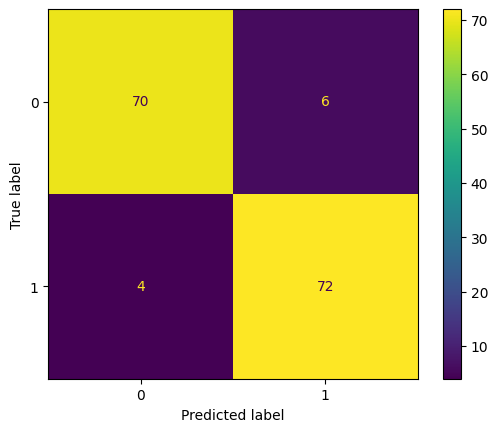

In [24]:
y_pred_1 = model_1.predict(X_test_std)

acc = accuracy_score(y_test, y_pred_1)
print('Best val acc score: ', acc)
conf_matrix = confusion_matrix(y_test, y_pred_1)
disp = ConfusionMatrixDisplay(confusion_matrix=conf_matrix)
disp.plot();

## Метрики для 2 модели

Best val acc score:  0.9210526315789473


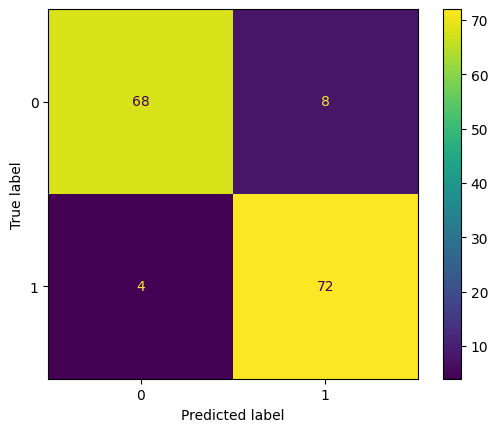

In [26]:
y_pred_2 = model_2.predict(X_test_std)

acc = accuracy_score(y_test, y_pred_2)
print('Best val acc score: ', acc)
conf_matrix = confusion_matrix(y_test, y_pred_2)
disp = ConfusionMatrixDisplay(confusion_matrix=conf_matrix)
disp.plot();

Матрица ошибок
Класс с меткой «1» называется положительным, с меткой «0» — отрицательным.

Если сравнить эти ответы с предсказаниями, получается такое деление:

* истинно положительные (англ. True Positive, TP) и истинно отрицательные ответы (англ. True Negative, TN);
* ложноположительные (англ. False Positive, FP) и ложноотрицательные ответы (англ. False Negative, FN).

Резюмируем. Характеристики «положительный» и «отрицательный» относятся к предсказанию, а «истинный» и «ложный» — к его правильности.

TP, FP, TN, FN собираются в одну таблицу — матрицу ошибок или матрицу неточностей (англ. сonfusion matrix).

Матрица формируется так:
* по горизонтали («Предсказания») располагаются метки алгоритма от 0 до 1;
* по вертикали («Ответы») — истинные метки класса от 0 до 1.

Что получаем:
1. По главной диагонали (от верхнего левого угла) выстроены правильные прогнозы:  
        TN в левом верхнем углу;  
        TP в правом нижнем углу.
2. Вне главной диагонали — ошибочные варианты:  
        FP в правом верхнем углу;  
        FN в левом нижнем углу.

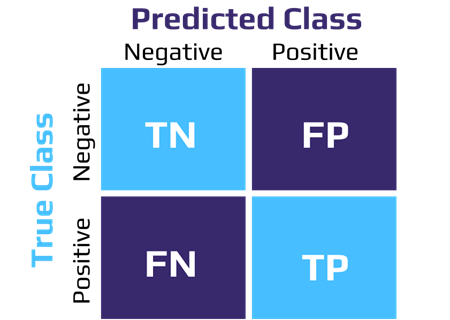




# Интерпретация

## 1 модель

### Важность весов

.coef_ используется для понимания важности или вклада каждой функции в прогноз, сделанный моделью.

Значения по модулю:

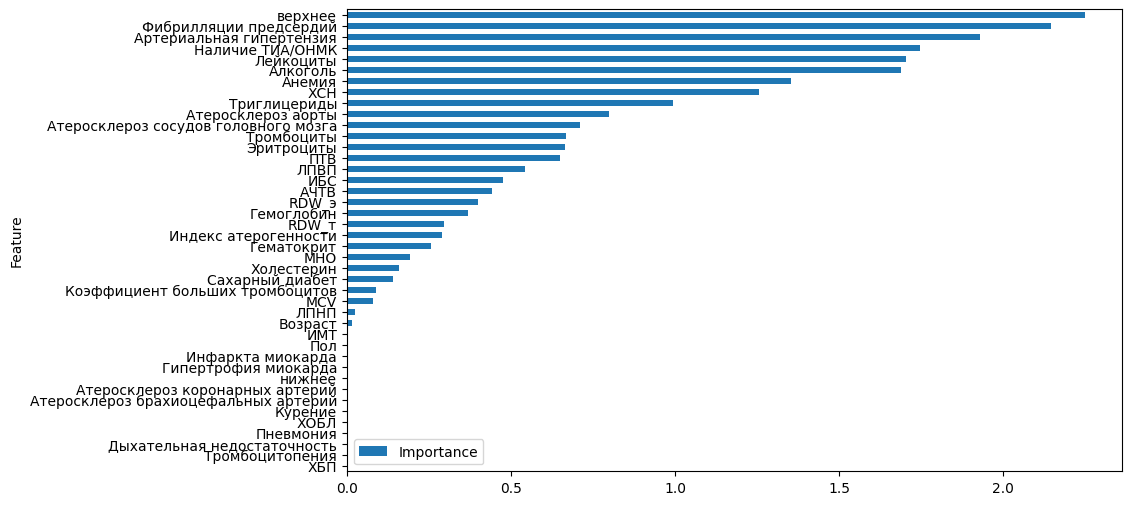

In [27]:
feature_importance = pd.DataFrame({'Feature': X.columns, 'Importance': np.abs(model_1.coef_[0])})
feature_importance = feature_importance.sort_values('Importance', ascending=True)
feature_importance.plot(x='Feature', y='Importance', kind='barh', figsize=(10, 6));

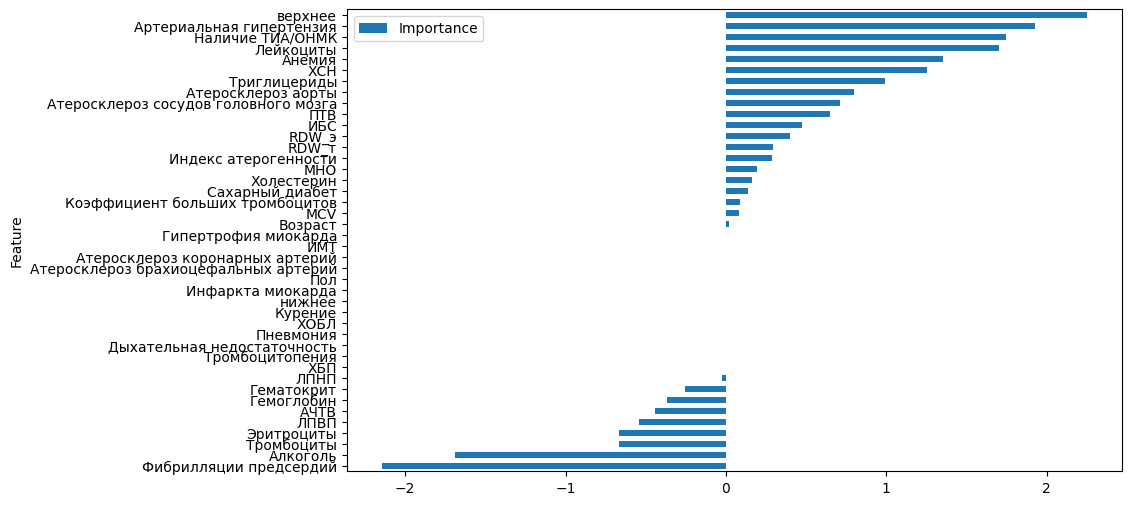

In [28]:
feature_importance = pd.DataFrame({'Feature': X.columns, 'Importance': model_1.coef_[0]})
feature_importance = feature_importance.sort_values('Importance', ascending=True)
feature_importance.plot(x='Feature', y='Importance', kind='barh', figsize=(10, 6));

In [29]:
eli5.show_weights(model_1, feature_names=X.columns.tolist())

Weight?,Feature
+2.248,верхнее
+1.929,Артериальная гипертензия
+1.746,Наличие ТИА/ОНМК
+1.702,Лейкоциты
+1.354,Анемия
+1.256,ХСН
+0.993,Триглицериды
+0.799,Атеросклероз аорты
+0.711,Атеросклероз сосудов головного мозга
+0.648,ПТВ


target_names: принимает значения в виде списка строк или словаря с отображением старых целевых имен на новые целевые имена. Этот параметр принимает список имен объектов, для которых мы хотим видеть отображаемые веса.  
Полученные значения говорят о том, какое влияние на предсказание в среднем оказывает каждый признак, а знак показывает в каком направлении оказывается это влияние. 

### Объяснение ответа эстиматора на 1 элемента

In [30]:
elem = 7
print("Actual Target Value : ", y_test.iloc[elem])

eli5.show_prediction(model_1, X_test.iloc[elem], feature_names=X_test.columns.tolist(), show_feature_values=True)

Actual Target Value :  True


Топ n фич по модулю

In [31]:
n = 7
eli5.show_prediction(model_1, X_test.iloc[elem], feature_names=X_test.columns.tolist(), show_feature_values=True, top=n)

### Важность перестановки

In [32]:
perm_1 = PermutationImportance(estimator=model_1, random_state=SEED).fit(X_test, y_test)
eli5.show_weights(perm_1, feature_names = X_test.columns.tolist())

Weight,Feature
0.0211 ± 0.0153,верхнее
0.0145 ± 0.0129,Лейкоциты
0.0092 ± 0.0429,Тромбоциты
0.0079 ± 0.0098,Гемоглобин
0.0066 ± 0.0118,АЧТВ
0.0066 ± 0.0000,Алкоголь
0.0026 ± 0.0064,Артериальная гипертензия
0.0013 ± 0.0053,Гематокрит
0.0013 ± 0.0053,Триглицериды
0 ± 0.0000,Курение


### Объяснение весов

In [33]:
eli5.explain_weights(model_1, feature_names=X.columns.tolist())

Weight?,Feature
+2.248,верхнее
+1.929,Артериальная гипертензия
+1.746,Наличие ТИА/ОНМК
+1.702,Лейкоциты
+1.354,Анемия
+1.256,ХСН
+0.993,Триглицериды
+0.799,Атеросклероз аорты
+0.711,Атеросклероз сосудов головного мозга
+0.648,ПТВ


## 2 модель

### Важность весов

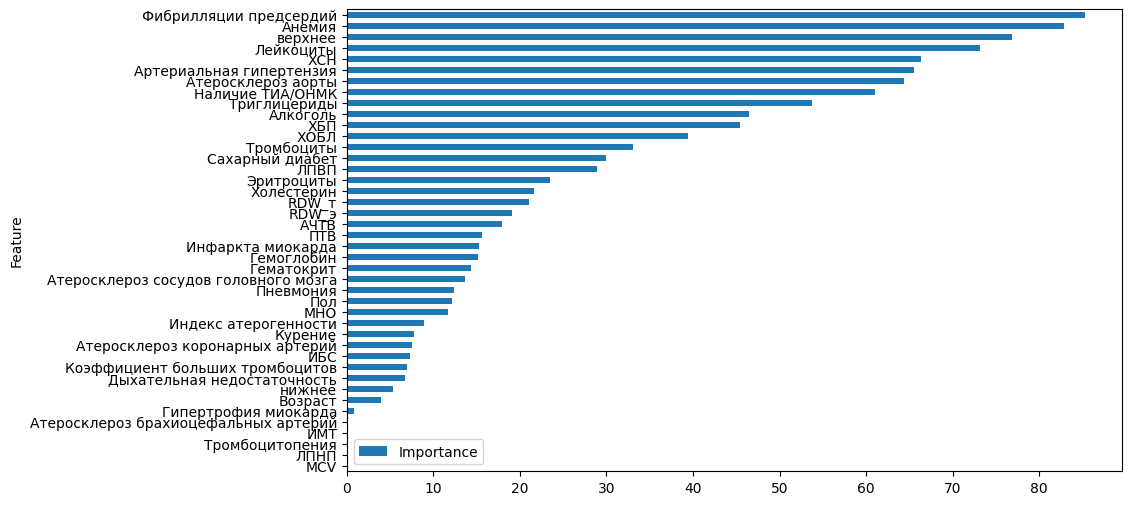

In [34]:
feature_importance = pd.DataFrame({'Feature': X.columns, 'Importance': np.abs(model_2.coef_[0])})
feature_importance = feature_importance.sort_values('Importance', ascending=True)
feature_importance.plot(x='Feature', y='Importance', kind='barh', figsize=(10, 6));

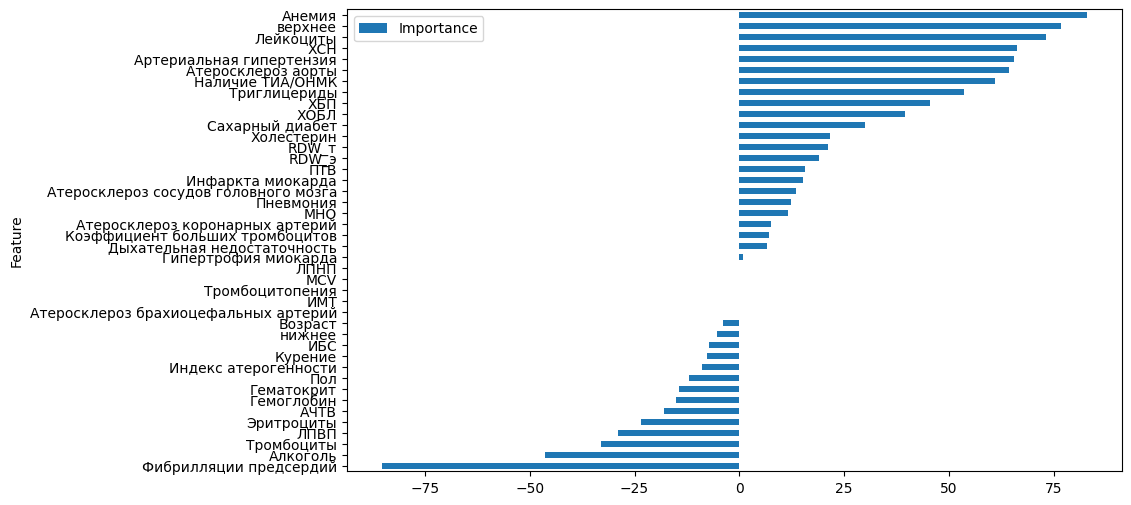

In [35]:
feature_importance = pd.DataFrame({'Feature': X.columns, 'Importance': model_2.coef_[0]})
feature_importance = feature_importance.sort_values('Importance', ascending=True)
feature_importance.plot(x='Feature', y='Importance', kind='barh', figsize=(10, 6));

In [36]:
eli5.show_weights(model_2, feature_names=X.columns.tolist())

Weight?,Feature
+82.868,Анемия
+76.865,верхнее
+73.186,Лейкоциты
+66.303,ХСН
+65.576,Артериальная гипертензия
+64.328,Атеросклероз аорты
+61.073,Наличие ТИА/ОНМК
+53.708,Триглицериды
+45.424,ХБП
+39.463,ХОБЛ


### Объяснение ответа эстиматора на 1 элемента

In [37]:
elem = 7
print("Actual Target Value : ", y_test.iloc[elem])

eli5.show_prediction(model_2, X_test.iloc[elem], feature_names=X_test.columns.tolist(), show_feature_values=True)

Actual Target Value :  True


Топ n фич по модулю

In [38]:
n = 7
eli5.show_prediction(model_2, X_test.iloc[elem], feature_names=X_test.columns.tolist(), show_feature_values=True, top=n)

### Важность перестановки

In [39]:
perm_2 = PermutationImportance(estimator=model_2, random_state=SEED).fit(X_test, y_test)
eli5.show_weights(perm_2, feature_names = X_test.columns.tolist())

Weight,Feature
0.1447 ± 0.0666,верхнее
0.1118 ± 0.0701,Тромбоциты
0.0276 ± 0.0053,Лейкоциты
0.0118 ± 0.0098,АЧТВ
0.0092 ± 0.0064,Гематокрит
0.0066 ± 0.0000,ПТВ
0.0039 ± 0.0064,нижнее
0.0039 ± 0.0064,RDW_т
0.0039 ± 0.0134,RDW_э
0.0039 ± 0.0339,Гемоглобин


### Объяснение весов

In [32]:
eli5.explain_weights(model_2, feature_names=X.columns.tolist())

Weight?,Feature
+86.012,верхнее
+85.662,Лейкоциты
+72.600,Артериальная гипертензия
+71.092,Атеросклероз аорты
+67.309,Анемия
+62.574,ХСН
+53.196,Триглицериды
+46.979,ХБП
+43.199,Наличие ТИА/ОНМК
+34.030,Сахарный диабет
